In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

In [3]:
data = pd.read_csv("vehicle_maintenance_data.csv")
print("Dataset Loaded Successfully!")
print("Shape of data:", data.shape)
print(data.head())

Dataset Loaded Successfully!
Shape of data: (50000, 20)
  Vehicle_Model  Mileage Maintenance_History  Reported_Issues  Vehicle_Age  \
0         Truck    58765                Good                0            4   
1           Van    60353             Average                1            7   
2           Bus    68072                Poor                0            2   
3           Bus    60849             Average                4            5   
4           Bus    45742                Poor                5            1   

  Fuel_Type Transmission_Type  Engine_Size  Odometer_Reading  \
0  Electric         Automatic         2000             28524   
1  Electric         Automatic         2500            133630   
2  Electric         Automatic         1500             34022   
3    Petrol         Automatic         2500             81636   
4    Petrol            Manual         2000             97162   

  Last_Service_Date Warranty_Expiry_Date Owner_Type  Insurance_Premium  \
0        2023-11

In [4]:
data = pd.read_csv("vehicle_maintenance_data.csv")

print(data.columns.tolist())


['Vehicle_Model', 'Mileage', 'Maintenance_History', 'Reported_Issues', 'Vehicle_Age', 'Fuel_Type', 'Transmission_Type', 'Engine_Size', 'Odometer_Reading', 'Last_Service_Date', 'Warranty_Expiry_Date', 'Owner_Type', 'Insurance_Premium', 'Service_History', 'Accident_History', 'Fuel_Efficiency', 'Tire_Condition', 'Brake_Condition', 'Battery_Status', 'Need_Maintenance']


In [3]:
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)
print("\nAfter cleaning:", data.shape)


After cleaning: (50000, 20)


In [ ]:
# Set Target Column
target = 'Need_Maintenance'  # change if different
if target not in data.columns:
    raise ValueError(f"Target column '{target}' not found. Columns: {data.columns.tolist()}")

# Encode Target (Yes/No → 1/0)
if data[target].dtype == 'object':
    data[target] = data[target].map({'Yes': 1, 'No': 0})
    if data[target].isnull().any():
        le = LabelEncoder()
        data[target] = le.fit_transform(data[target])

print("\nTarget Value Counts:")
print(data[target].value_counts())


Target Value Counts:
Need_Maintenance
1    40498
0     9502
Name: count, dtype: int64


In [ ]:
#  Split Features and Target
X = data.drop(columns=[target])
y = data[target]

# Convert text columns to numeric
X = pd.get_dummies(X, drop_first=True)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nData Split Done!")
print("Train Shape:", X_train.shape, "Test Shape:", X_test.shape)


Data Split Done!
Train Shape: (40000, 1062) Test Shape: (10000, 1062)


In [ ]:
# Train Decision Tree Model
model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X_train, y_train)
print("\nModel Trained Successfully!")



Model Trained Successfully!


In [13]:
y_pred = model.predict(X_test)


In [ ]:
# Evaluate Model
acc = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {acc*100:.2f}%")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 100.00%

Confusion Matrix:
 [[1915    0]
 [   0 8085]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1915
           1       1.00      1.00      1.00      8085

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



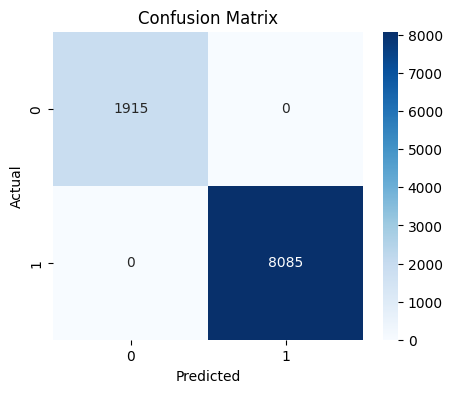

In [ ]:
# Visualize Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Top 10 Important Features:
Reported_Issues                    0.301152
Battery_Status_Weak                0.223949
Brake_Condition_Worn Out           0.181454
Service_History                    0.099937
Accident_History                   0.096813
Maintenance_History_Poor           0.075998
Maintenance_History_Good           0.020698
Warranty_Expiry_Date_2026-03-05    0.000000
Warranty_Expiry_Date_2026-03-06    0.000000
Warranty_Expiry_Date_2026-03-07    0.000000
dtype: float64


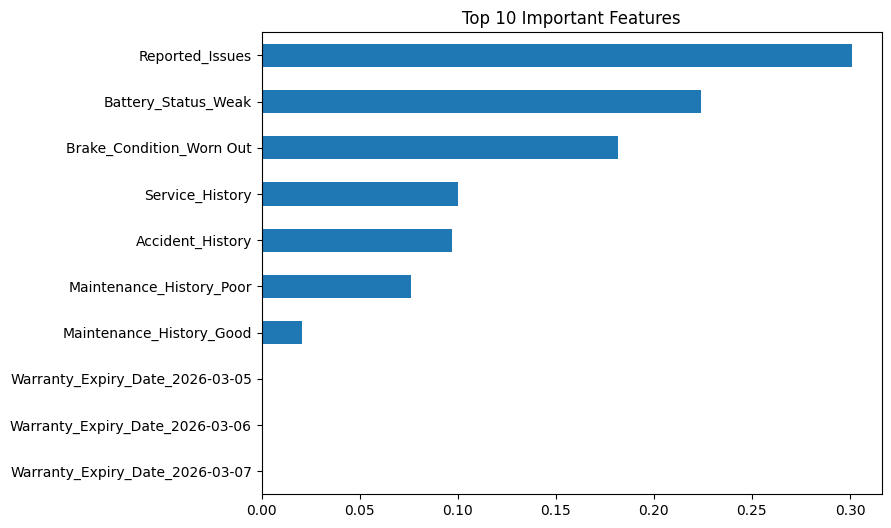

In [ ]:

# Feature Importance
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nTop 10 Important Features:")
print(importances.head(10))

plt.figure(figsize=(8,6))
importances.head(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.gca().invert_yaxis()
plt.show()


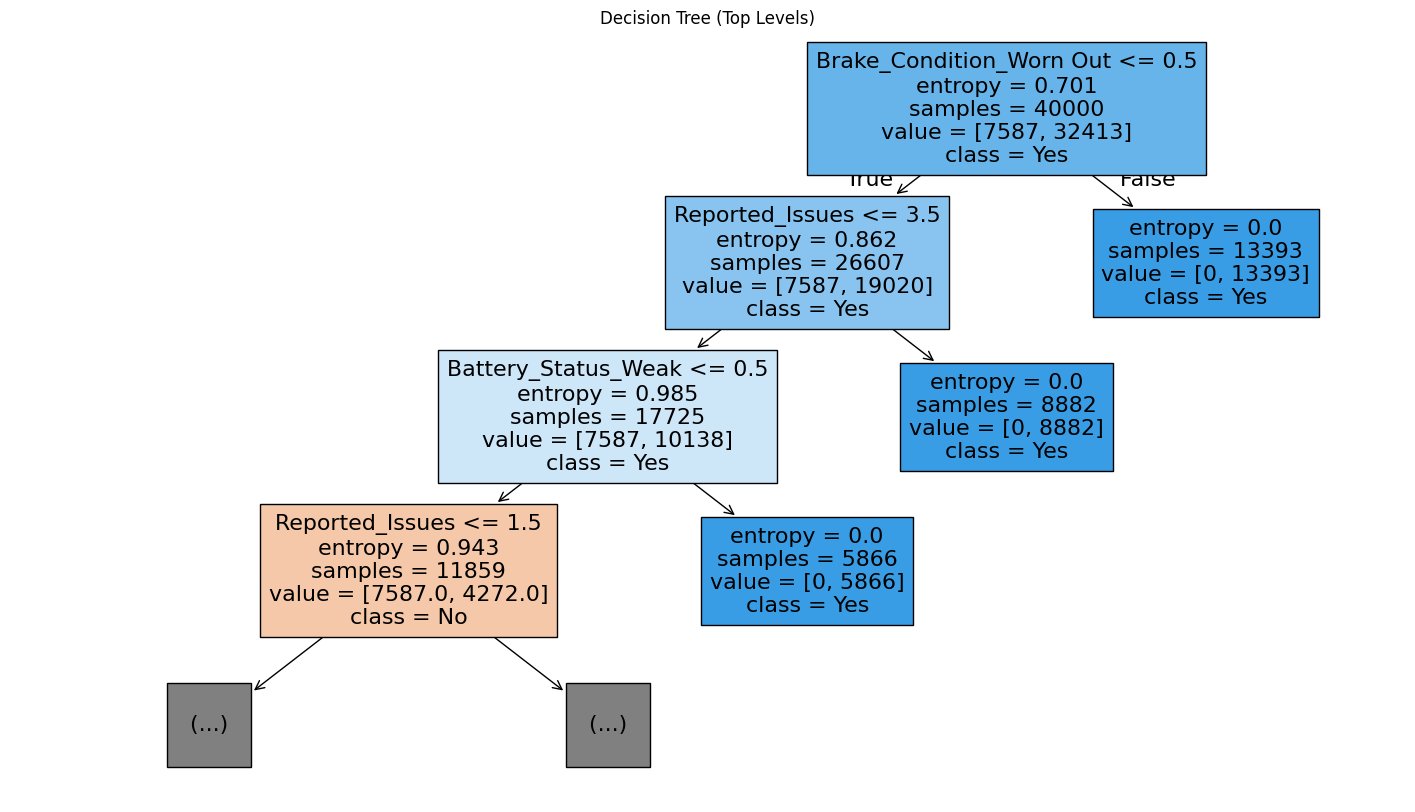

In [ ]:
#  Visualize Tree
plt.figure(figsize=(18,10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['No','Yes'], max_depth=3)
plt.title("Decision Tree (Top Levels)")
plt.show()

In [19]:
# 💾 13) Save Model
with open("decision_tree_maintenance_model.pkl", "wb") as f:
    pickle.dump(model, f)
print("\nModel saved as 'decision_tree_maintenance_model.pkl'")


Model saved as 'decision_tree_maintenance_model.pkl'


In [20]:
# 🔁 14) Load and Test on One Sample
with open("decision_tree_maintenance_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

sample = X_test.iloc[[0]]
print("\nSample Input:\n", sample)
print("\nPredicted Maintenance Required:", loaded_model.predict(sample)[0])
print("Actual:", y_test.iloc[0])


Sample Input:
        Mileage  Reported_Issues  Vehicle_Age  Engine_Size  Odometer_Reading  \
33553    53723                3            4          800            120202   

       Insurance_Premium  Service_History  Accident_History  Fuel_Efficiency  \
33553               7230               10                 0        12.082875   

       Vehicle_Model_Car  ...  Warranty_Expiry_Date_2026-03-28  \
33553              False  ...                            False   

       Warranty_Expiry_Date_2026-03-29  Owner_Type_Second  Owner_Type_Third  \
33553                            False              False              True   

       Tire_Condition_New  Tire_Condition_Worn Out  Brake_Condition_New  \
33553               False                     True                 True   

       Brake_Condition_Worn Out  Battery_Status_New  Battery_Status_Weak  
33553                     False                True                False  

[1 rows x 1062 columns]

Predicted Maintenance Required: 1
Actual: 1
